In [1]:
import pandas as pd
import pylab as plt
import numpy as np
df = pd.read_csv('Data/titanic data.csv')
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [2]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


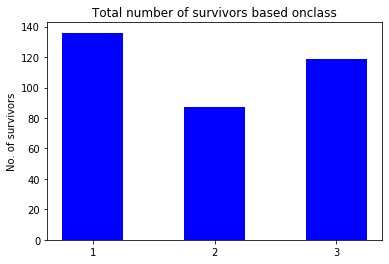

In [4]:
#Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)
print(survivors)
#Total Passengers in each class
total_passengers =df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers
print(total_passengers)
#Plotting the Total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(),
survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based onclass')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())

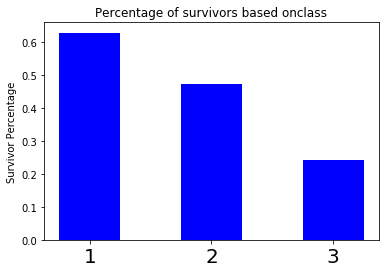

In [5]:
#Plotting the percentage of survivors in each class
fig = plt.figure()
ax = fig.add_subplot(111)
rect =ax.bar(survivor_percentage.index.values.tolist(),
survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based onclass')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

In [6]:
#Checking for any null values
df['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

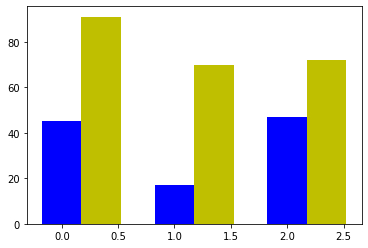

In [9]:
# Male Passengers survived in each class
male_survivors = df[df['Sex'] =='male'].groupby('Pclass')['Survived'].agg(sum)
#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] =='male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors /male_total_passengers
# Female Passengers survived in each class
female_survivors = df[df['Sex'] =='female'].groupby('Pclass')['Survived'].agg(sum)
#Total Female Passengers in each class
female_total_passengers = df[df['Sex'] =='female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors /female_total_passengers
#Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width,color='blue',label='Men')
rect2 = ax.bar(index + bar_width, female_survivors,bar_width,color='y', label='Women')



In [11]:

df['SibSp'].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [12]:
df['Parch'].isnull().value_counts()

False    891
Name: Parch, dtype: int64

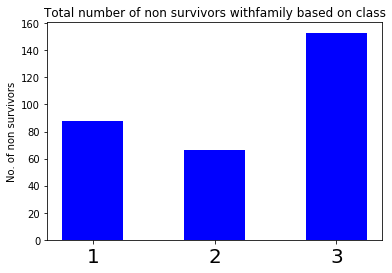

In [14]:
#Total number of non-survivors in each class
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] >
0) &
(df['Survived'] ==
0)].groupby('Pclass')['Survived'].agg('count')
#Total passengers in each class
total_passengers =df.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors /total_passengers
#Total number of non survivors with family based onclass
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(),non_survivors,color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors withfamily based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())

xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

In [15]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

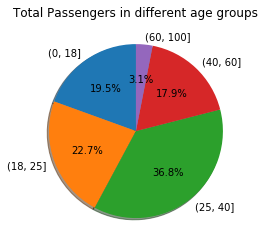

In [16]:
#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]
#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)
#Removing the null rows
d_temp = df[np.isfinite(df['Age'])] # removing all na instances
#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)
#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')
#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers,
labels=total_passengers.index.values.tolist(),
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()


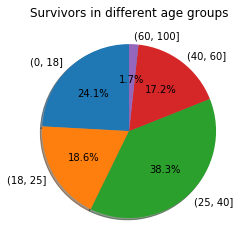

In [18]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors,labels=survivors.index.values.tolist(),autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()